In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [66]:
liga = '/workspaces/proyecto_ml/input/estudiantes.csv'
data = pd.read_csv(liga)

print(data.head())

estadisticas = data.describe(include='all')
print(estadisticas)

  escuela sexo  edad direccion tamano_familia estatus_padres  educacion_madre  \
0      GP    F    18         U            GT3              A                4   
1      GP    F    17         U            GT3              T                1   
2      GP    F    15         U            LE3              T                1   
3      GP    F    15         U            GT3              T                4   
4      GP    F    16         U            GT3              T                3   

   educacion_padre trabajo_madre trabajo_padre  ...  \
0                4       at_home       teacher  ...   
1                1       at_home         other  ...   
2                1       at_home         other  ...   
3                2        health      services  ...   
4                3         other         other  ...   

  calidad_relaciones_familiares tiempo_libre  salidas  \
0                             4            3        4   
1                             5            3        3   
2          

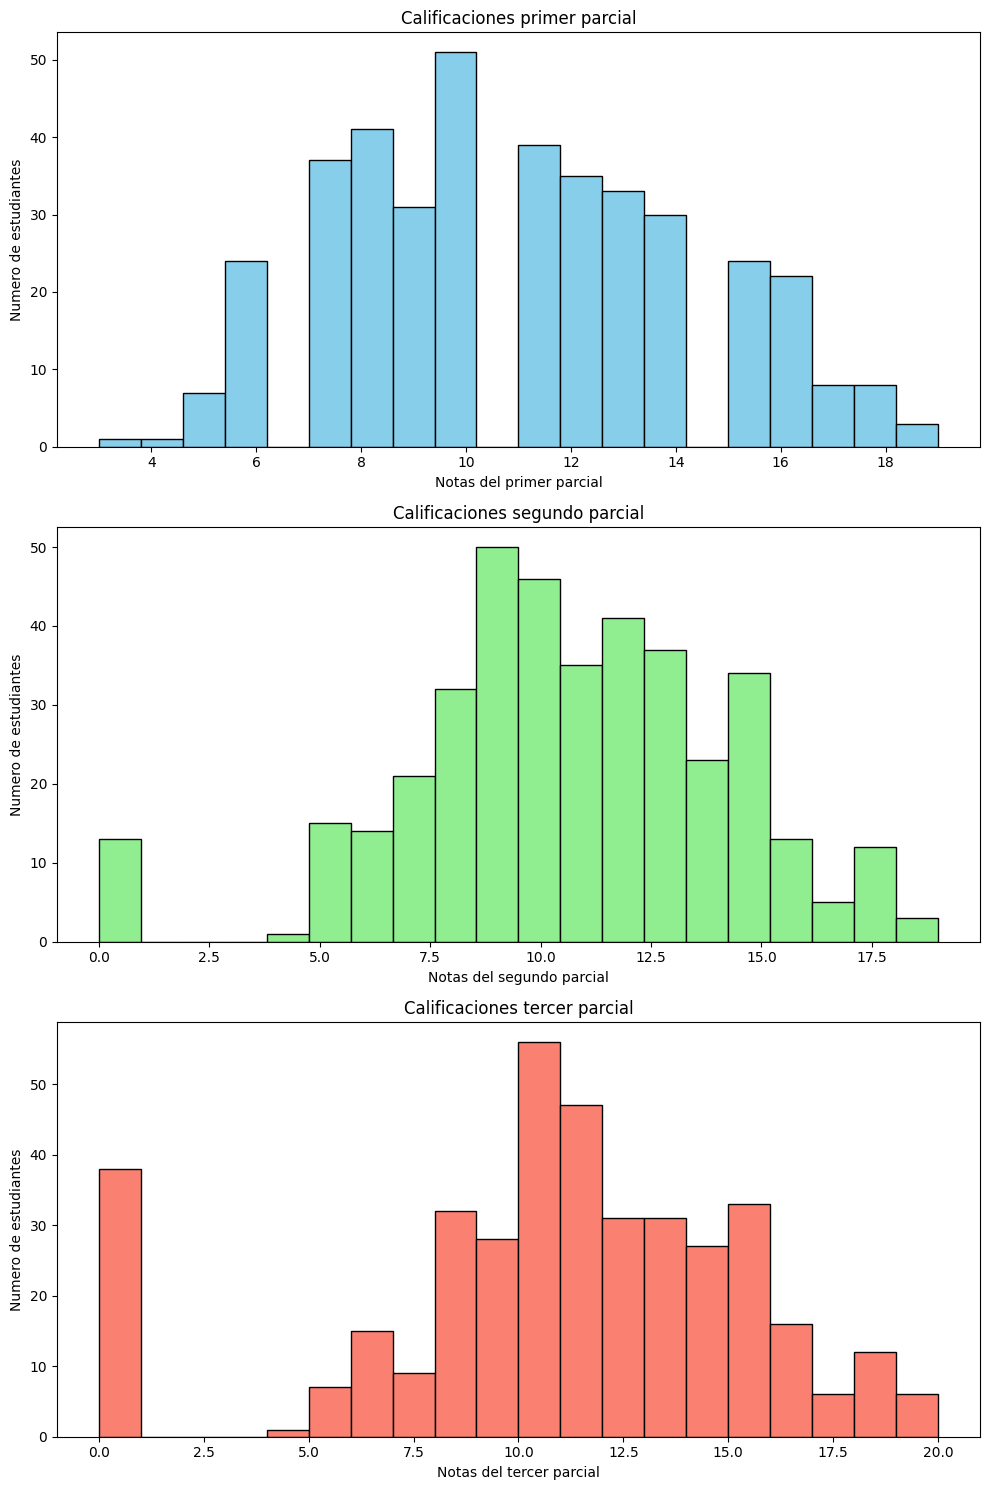

In [67]:
# Grafica notas de los parciales
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
axs[0].hist(data['P1'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Calificaciones primer parcial')
axs[0].set_xlabel('Notas del primer parcial')
axs[0].set_ylabel('Numero de estudiantes')


axs[1].hist(data['P2'], bins=20, color='lightgreen', edgecolor='black')
axs[1].set_title('Calificaciones segundo parcial')
axs[1].set_xlabel('Notas del segundo parcial')
axs[1].set_ylabel('Numero de estudiantes')

axs[2].hist(data['P3'], bins=20, color='salmon', edgecolor='black')
axs[2].set_title('Calificaciones tercer parcial')
axs[2].set_xlabel('Notas del tercer parcial')
axs[2].set_ylabel('Numero de estudiantes')

plt.tight_layout()
plt.show()

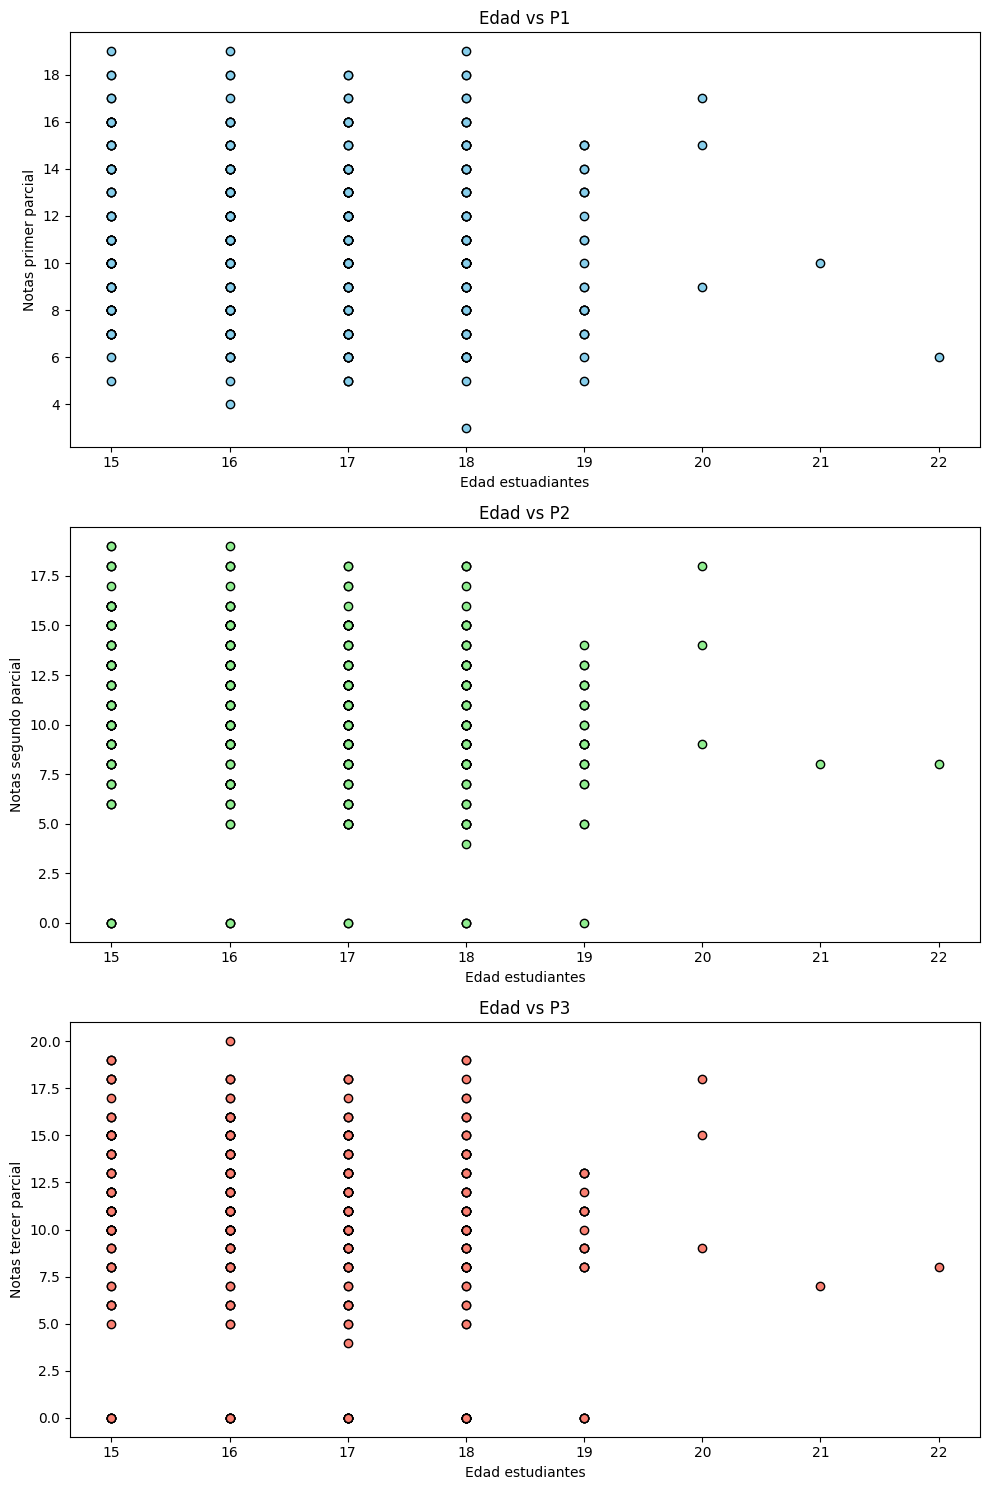

In [68]:
# Gráfico Edad vs Notas de los parciales
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
axs[0].scatter(data['edad'], data['P1'], color='skyblue', edgecolor='black')
axs[0].set_title('Edad vs P1')
axs[0].set_xlabel('Edad estuadiantes')
axs[0].set_ylabel('Notas primer parcial')

axs[1].scatter(data['edad'], data['P2'], color='lightgreen', edgecolor='black')
axs[1].set_title('Edad vs P2')
axs[1].set_xlabel('Edad estudiantes')
axs[1].set_ylabel('Notas segundo parcial')

axs[2].scatter(data['edad'], data['P3'], color='salmon', edgecolor='black')
axs[2].set_title('Edad vs P3')
axs[2].set_xlabel('Edad estudiantes')
axs[2].set_ylabel('Notas tercer parcial')

plt.tight_layout()
plt.show()

In [69]:
# Codificación de variables categóricas
data_encoded = pd.get_dummies(data, drop_first=True)
print(data_encoded.head())

# Características (X) y etiquetas (y)
X = data_encoded.drop(columns=['P3'])
y = data_encoded['P3']

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización/Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

   edad  educacion_madre  educacion_padre  traslado_escuela  tiempo_estudio  \
0    18                4                4                 2               2   
1    17                1                1                 1               2   
2    15                1                1                 1               2   
3    15                4                2                 1               3   
4    16                3                3                 1               2   

   reprobacion  calidad_relaciones_familiares  tiempo_libre  salidas  \
0            0                              4             3        4   
1            0                              5             3        3   
2            3                              4             3        2   
3            0                              3             2        2   
4            0                              4             3        2   

   consume_alc_entre_semana  ...  tutor_mother  tutor_other  \
0                         1  

Regresión Lineal - MSE: 5.6566428332312215 R²: 0.7241341236974022


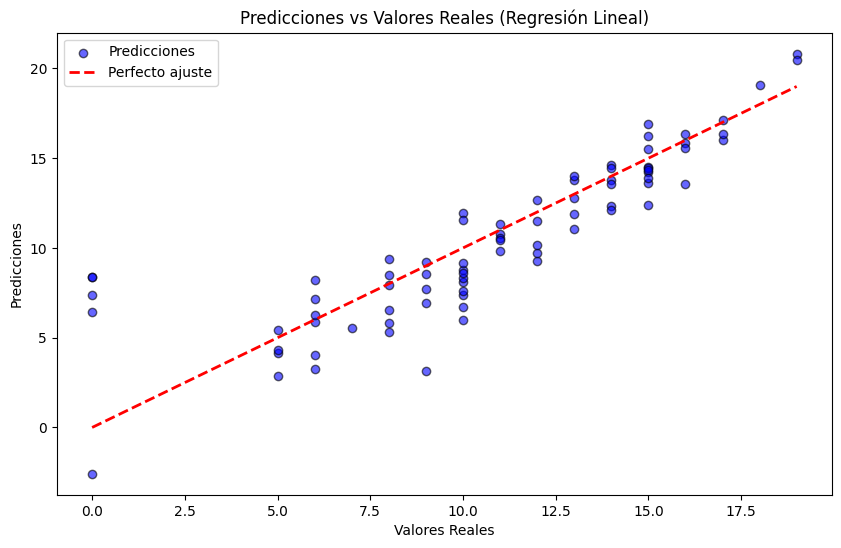

In [70]:
# Modelo de Regresión Lineal
modelo_rl = LinearRegression()
modelo_rl.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba
predicciones_rl = modelo_rl.predict(X_test_scaled)

# Evaluación del modelo
mse_rl = mean_squared_error(y_test, predicciones_rl)
r2_rl = r2_score(y_test, predicciones_rl)
print('Regresión Lineal - MSE:', mse_rl, 'R²:', r2_rl)

# Visualización de las predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicciones_rl, color='blue', edgecolor='k', alpha=0.6, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfecto ajuste')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (Regresión Lineal)')
plt.legend()
plt.show()

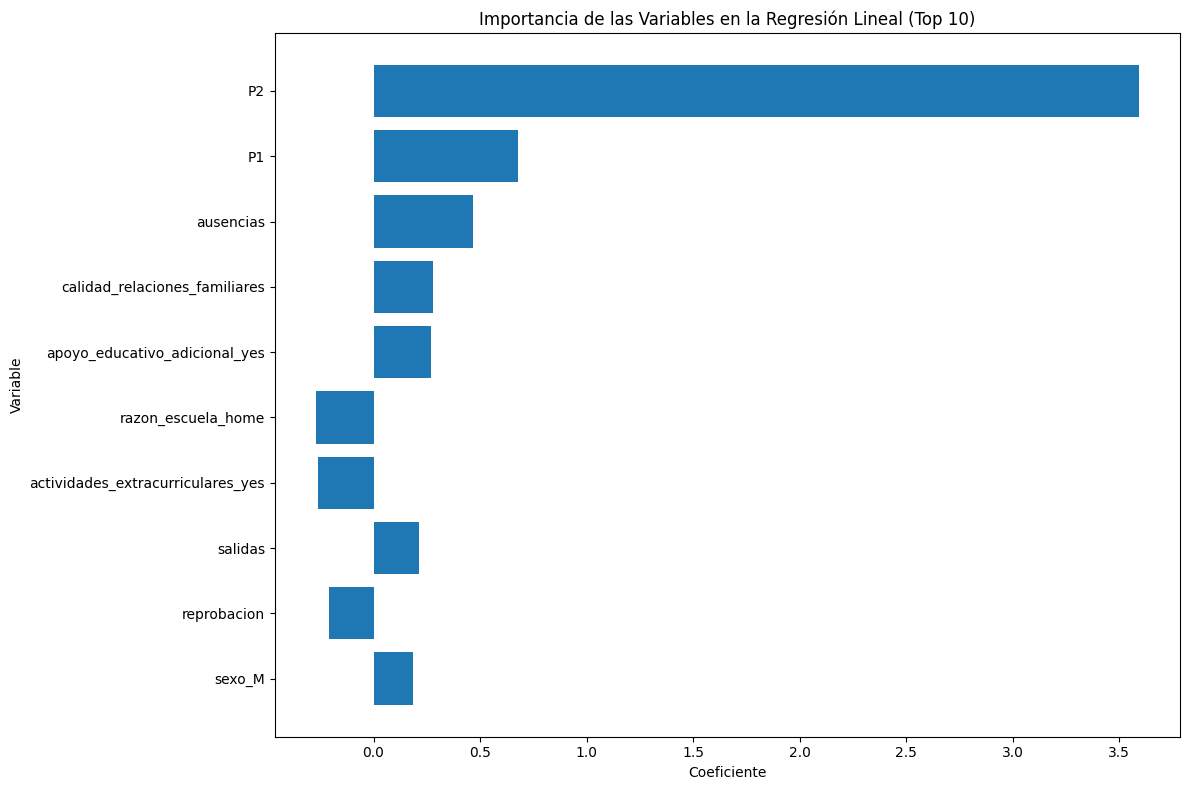

In [71]:
# Extraer los coeficientes del modelo de Regresión Lineal
coeficientes = modelo_rl.coef_
indices = np.argsort(np.abs(coeficientes))[::-1]

# Seleccionar las 10 variables más importantes
top_n = 10
indices_top_n = indices[:top_n]
coeficientes_top_n = coeficientes[indices_top_n]
variables_top_n = X.columns[indices_top_n]

# Crear un DataFrame para la importancia de las variables
importancia_df = pd.DataFrame({
    'Variable': variables_top_n,
    'Coeficiente': coeficientes_top_n
})

# Visualización de la importancia de las variables (gráfico horizontal)
plt.figure(figsize=(12, 8))
plt.title("Importancia de las Variables en la Regresión Lineal (Top 10)")
plt.barh(importancia_df['Variable'], importancia_df['Coeficiente'], align="center")
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Random Forest - MSE: 3.8347658227848105 R²: 0.8129842973462945


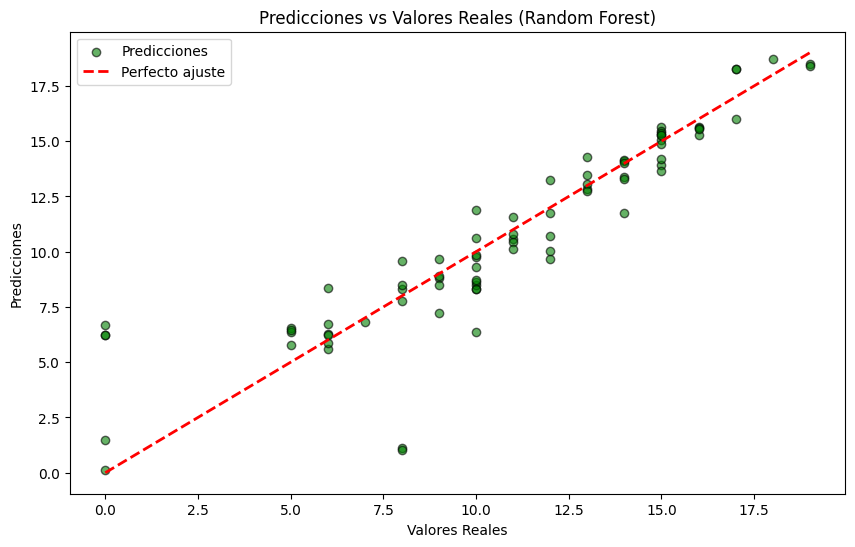

In [72]:
# Modelo de Random Forest
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba
predicciones_rf = modelo_rf.predict(X_test_scaled)

# Evaluación del modelo
mse_rf = mean_squared_error(y_test, predicciones_rf)
r2_rf = r2_score(y_test, predicciones_rf)
print('Random Forest - MSE:', mse_rf, 'R²:', r2_rf)

# Visualización de las predicciones vs valores reales para Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicciones_rf, color='green', edgecolor='k', alpha=0.6, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfecto ajuste')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (Random Forest)')
plt.legend()
plt.show()

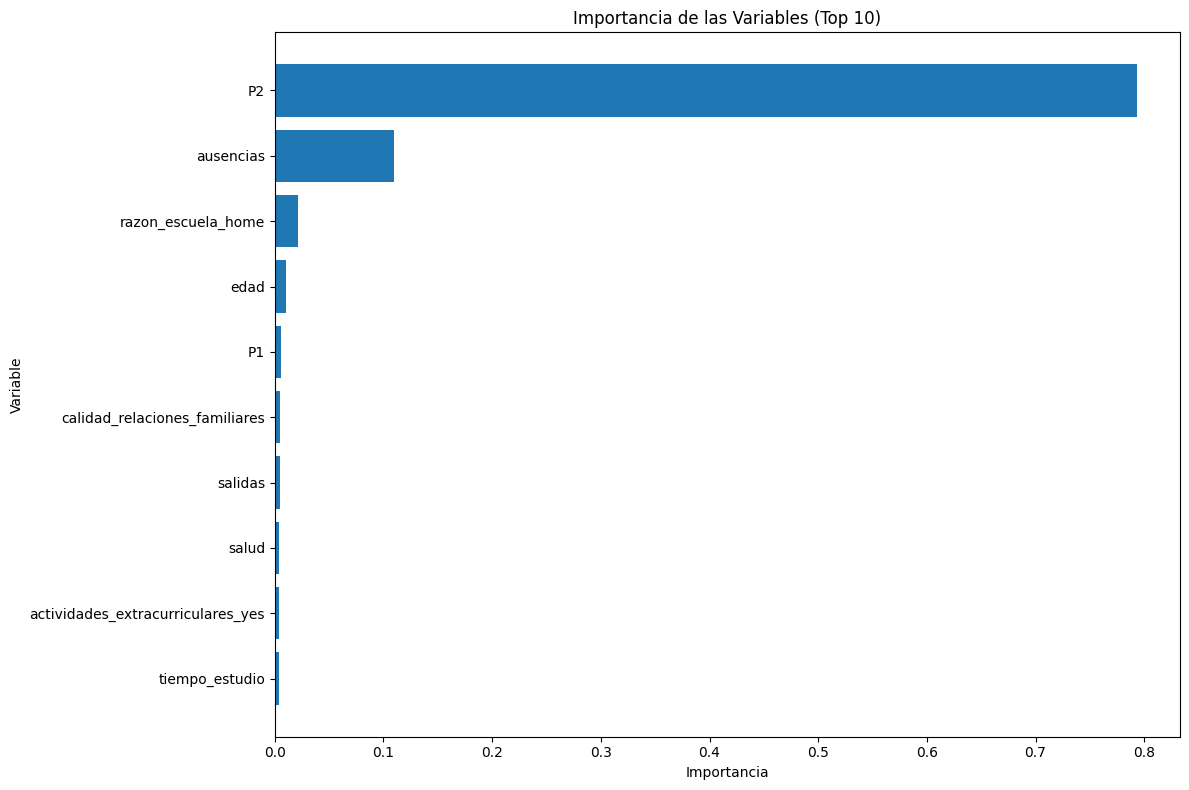

In [73]:
# Extraer la importancia de las variables
importancia_variables = modelo_rf.feature_importances_
indices = np.argsort(importancia_variables)[::-1]

# Seleccionar las 10 variables más importantes
top_n = 10
indices_top_n = indices[:top_n]
importancia_top_n = importancia_variables[indices_top_n]
variables_top_n = X.columns[indices_top_n]

# Crear un DataFrame para la importancia de las variables
importancia_df = pd.DataFrame({
    'Variable': variables_top_n,
    'Importancia': importancia_top_n
})

# Visualización de la importancia de las variables (gráfico horizontal)
plt.figure(figsize=(12, 8))
plt.title("Importancia de las Variables (Top 10)")
plt.barh(importancia_df['Variable'], importancia_df['Importancia'], align="center")
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

SVM - MSE: 7.431238044176816 R²: 0.6375898115704411


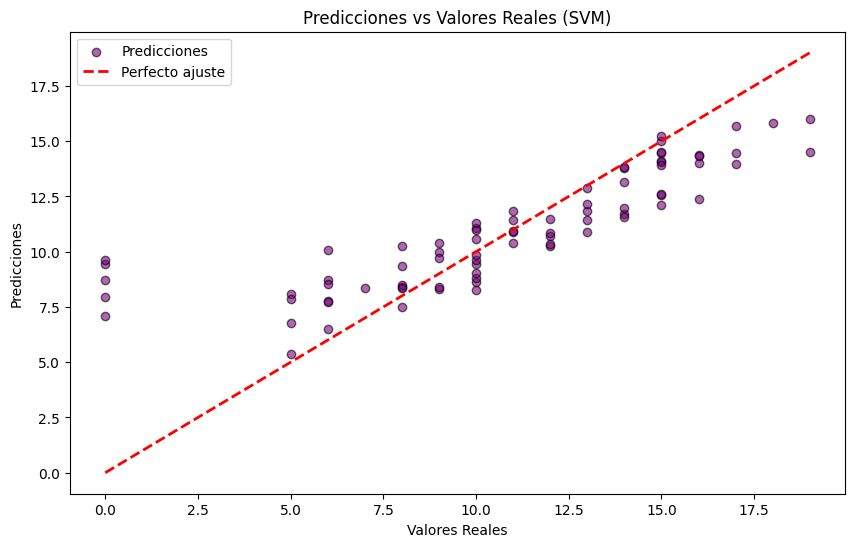

In [74]:
# Modelo de Support Vector Machine (SVM)
modelo_svm = SVR(kernel='rbf')
modelo_svm.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba
predicciones_svm = modelo_svm.predict(X_test_scaled)

# Evaluación del modelo
mse_svm = mean_squared_error(y_test, predicciones_svm)
r2_svm = r2_score(y_test, predicciones_svm)
print('SVM - MSE:', mse_svm, 'R²:', r2_svm)

# Visualización de las predicciones vs valores reales para SVM
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicciones_svm, color='purple', edgecolor='k', alpha=0.6, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfecto ajuste')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (SVM)')
plt.legend()
plt.show()

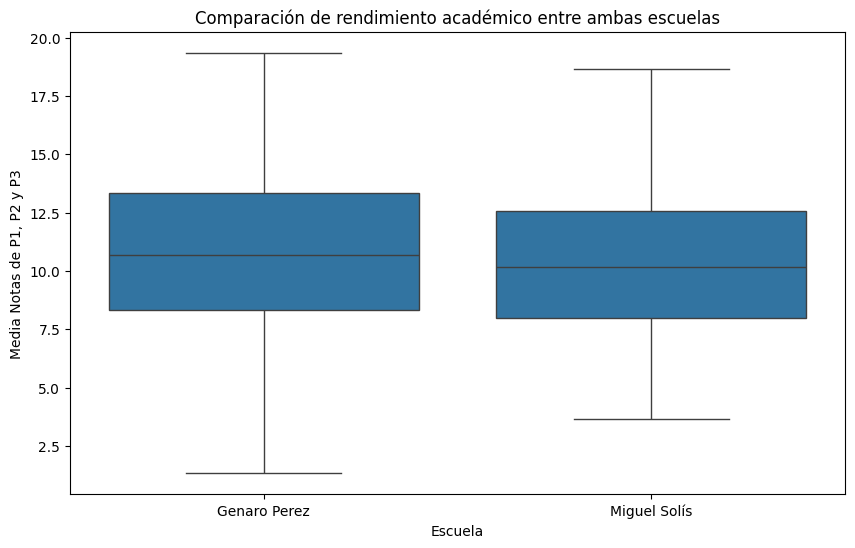

In [75]:
data['media_notas'] = data[['P1', 'P2', 'P3']].mean(axis=1)

escuela_nombres = {
    'GP': 'Genaro Perez',
    'MS': 'Miguel Solís'
}

data['escuela_nombre'] = data['escuela'].map(escuela_nombres)

#Grafica
plt.figure(figsize=(10, 6))
sns.boxplot(x='escuela_nombre', y='media_notas', data=data)
plt.title('Comparación de rendimiento académico entre ambas escuelas')
plt.xlabel('Escuela')
plt.ylabel('Media Notas de P1, P2 y P3')
plt.show()

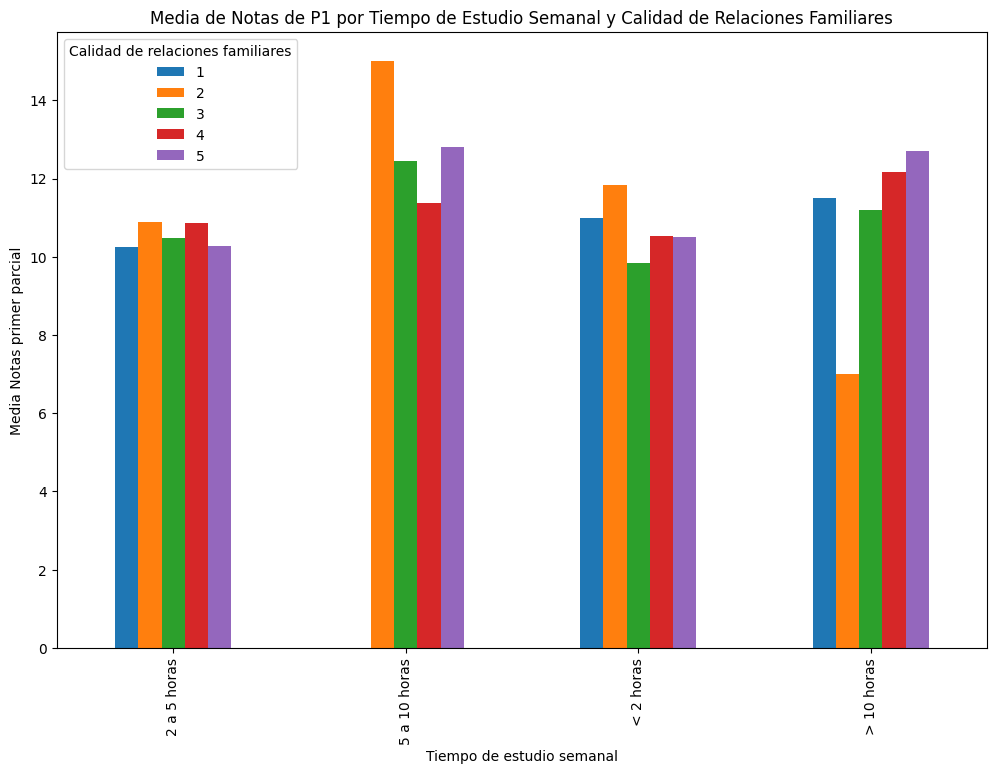

In [76]:
# Mapear valores
study_time_labels = {1: '< 2 horas', 2: '2 a 5 horas', 3: '5 a 10 horas', 4: '> 10 horas'}
data['tiempo_estudio_label'] = data['tiempo_estudio'].map(study_time_labels)

# Calcular media p1
p1 = data.groupby(['tiempo_estudio_label', 'calidad_relaciones_familiares'])['P1'].mean().unstack()

# Grafica
p1.plot(kind='bar', figsize=(12, 8))
plt.title('Media de Notas de P1 por Tiempo de Estudio Semanal y Calidad de Relaciones Familiares')
plt.xlabel('Tiempo de estudio semanal')
plt.ylabel('Media Notas primer parcial')
plt.legend(title='Calidad de relaciones familiares')
plt.show()

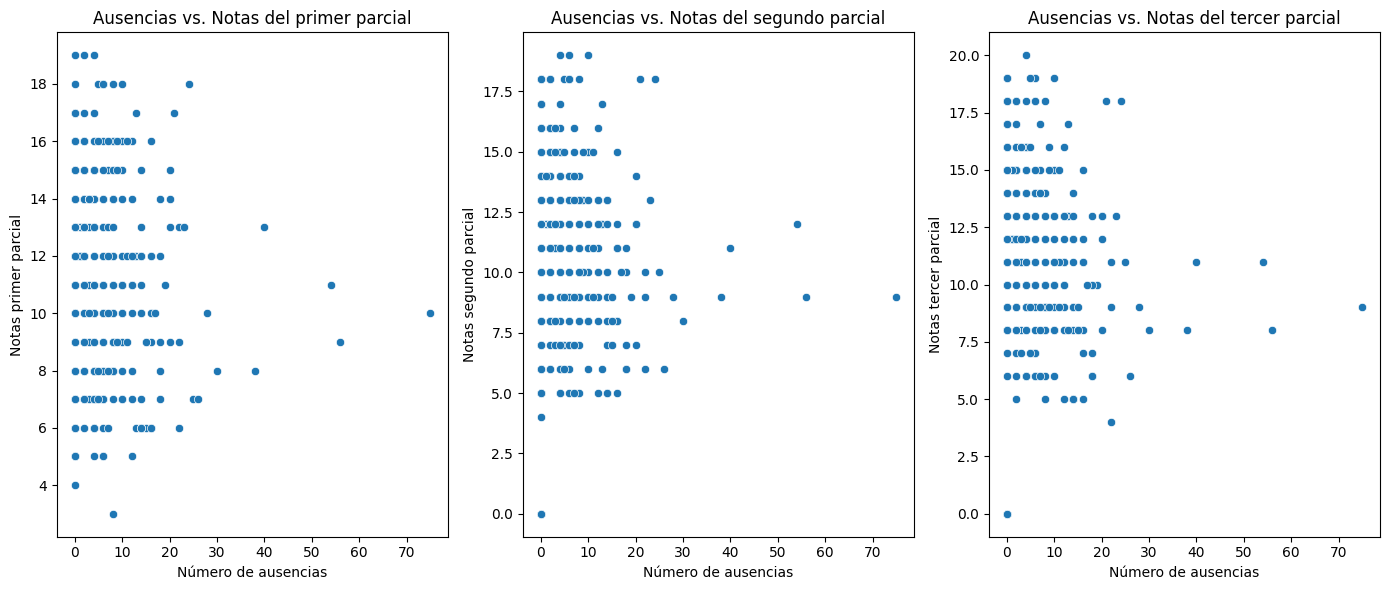

In [77]:
plt.figure(figsize=(14, 6))

# Gráfico P1
plt.subplot(1, 3, 1)
sns.scatterplot(x='ausencias', y='P1', data=data)
plt.title('Ausencias vs. Notas del primer parcial')
plt.xlabel('Número de ausencias')
plt.ylabel('Notas primer parcial')

# Gráfico P2
plt.subplot(1, 3, 2)
sns.scatterplot(x='ausencias', y='P2', data=data)
plt.title('Ausencias vs. Notas del segundo parcial')
plt.xlabel('Número de ausencias')
plt.ylabel('Notas segundo parcial')

# Gráfico P3
plt.subplot(1, 3, 3)
sns.scatterplot(x='ausencias', y='P3', data=data)
plt.title('Ausencias vs. Notas del tercer parcial')
plt.xlabel('Número de ausencias')
plt.ylabel('Notas tercer parcial')

plt.tight_layout()
plt.show()


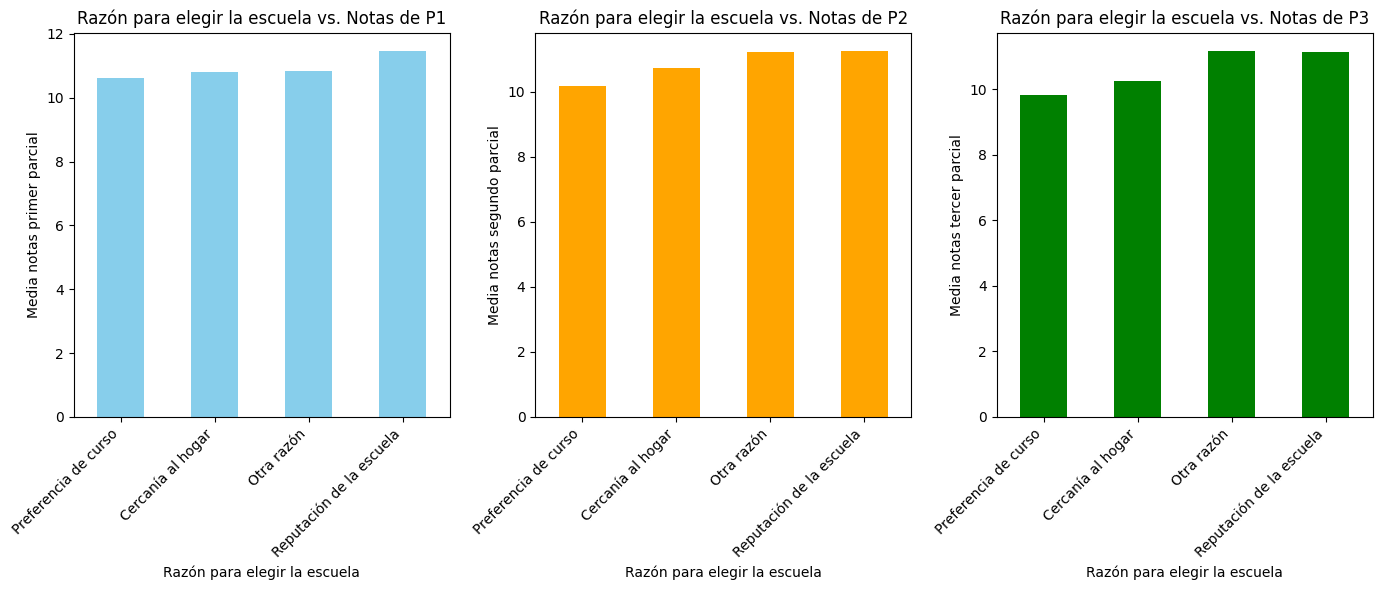

In [78]:
p1_razon = data.groupby('razon_escuela')['P1'].mean()
p2_razon = data.groupby('razon_escuela')['P2'].mean()
p3_razon = data.groupby('razon_escuela')['P3'].mean()

razon_descripciones = {
    'course': 'Preferencia de curso',
    'home': 'Cercanía al hogar',
    'other': 'Otra razón',
    'reputation': 'Reputación de la escuela'
}


plt.figure(figsize=(14, 6))

# Gráfico P1
plt.subplot(1, 3, 1)
p1_razon.plot(kind='bar', color='skyblue')
plt.title('Razón para elegir la escuela vs. Notas de P1')
plt.xlabel('Razón para elegir la escuela')
plt.ylabel('Media notas primer parcial')
plt.xticks(ticks=range(len(p1_razon)), labels=[razon_descripciones[razon] for razon in p1_razon.index], rotation=45, ha='right')

# Gráfico P2
plt.subplot(1, 3, 2)
p2_razon.plot(kind='bar', color='orange')
plt.title('Razón para elegir la escuela vs. Notas de P2')
plt.xlabel('Razón para elegir la escuela')
plt.ylabel('Media notas segundo parcial')
plt.xticks(ticks=range(len(p2_razon)), labels=[razon_descripciones[razon] for razon in p2_razon.index], rotation=45, ha='right')

# Gráfico P3
plt.subplot(1, 3, 3)
p3_razon.plot(kind='bar', color='green')
plt.title('Razón para elegir la escuela vs. Notas de P3')
plt.xlabel('Razón para elegir la escuela')
plt.ylabel('Media notas tercer parcial')
plt.xticks(ticks=range(len(p3_razon)), labels=[razon_descripciones[razon] for razon in p3_razon.index], rotation=45, ha='right')

plt.tight_layout()
plt.show()


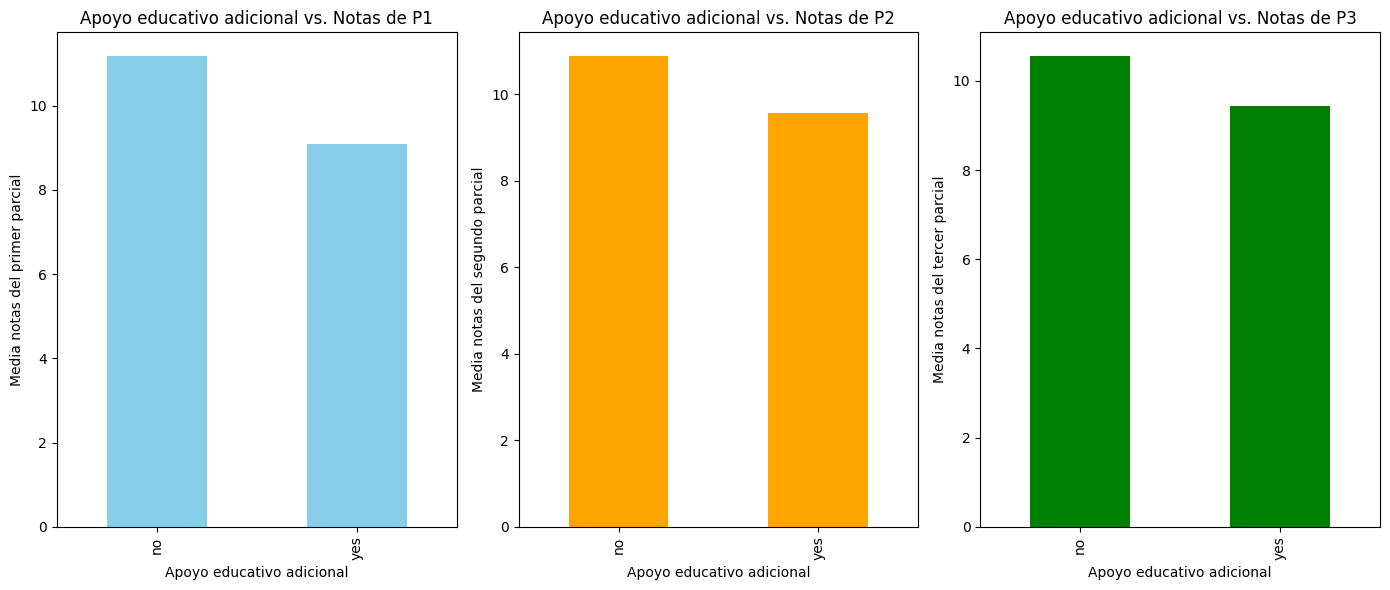

In [79]:
# Calcular la media de las notas de P1, P2, y P3 para el apoyo educativo adicional
p1_apoyo = data.groupby('apoyo_educativo_adicional')['P1'].mean()
p2_apoyo = data.groupby('apoyo_educativo_adicional')['P2'].mean()
p3_apoyo = data.groupby('apoyo_educativo_adicional')['P3'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(14, 6))

# Gráfico de barras para P1
plt.subplot(1, 3, 1)
p1_apoyo.plot(kind='bar', color='skyblue')
plt.title('Apoyo educativo adicional vs. Notas de P1')
plt.xlabel('Apoyo educativo adicional')
plt.ylabel('Media notas del primer parcial')

# Gráfico de barras para P2
plt.subplot(1, 3, 2)
p2_apoyo.plot(kind='bar', color='orange')
plt.title('Apoyo educativo adicional vs. Notas de P2')
plt.xlabel('Apoyo educativo adicional')
plt.ylabel('Media notas del segundo parcial')

# Gráfico de barras para P3
plt.subplot(1, 3, 3)
p3_apoyo.plot(kind='bar', color='green')
plt.title('Apoyo educativo adicional vs. Notas de P3')
plt.xlabel('Apoyo educativo adicional')
plt.ylabel('Media notas del tercer parcial')

plt.tight_layout()
plt.show()


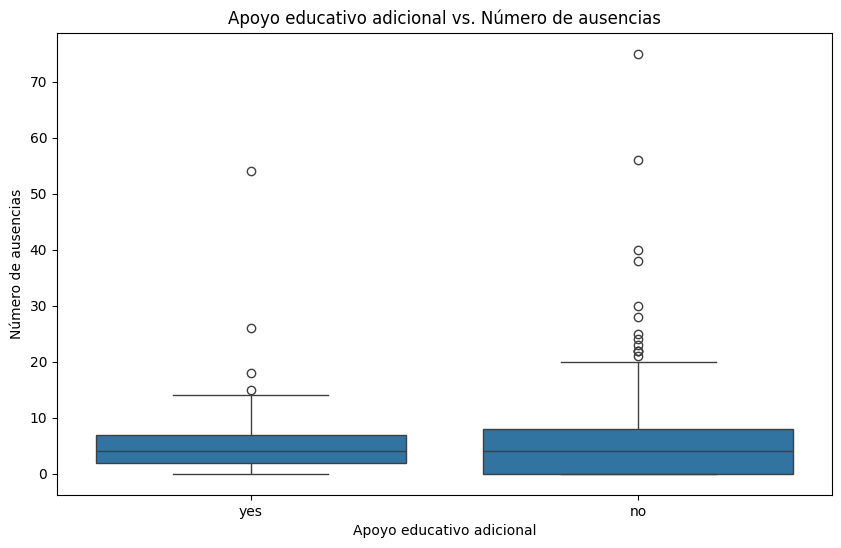

In [80]:
# Crear un gráfico de dispersión para comparar el apoyo educativo adicional con el número de ausencias
plt.figure(figsize=(10, 6))
sns.boxplot(x='apoyo_educativo_adicional', y='ausencias', data=data)
plt.title('Apoyo educativo adicional vs. Número de ausencias')
plt.xlabel('Apoyo educativo adicional')
plt.ylabel('Número de ausencias')
plt.show()


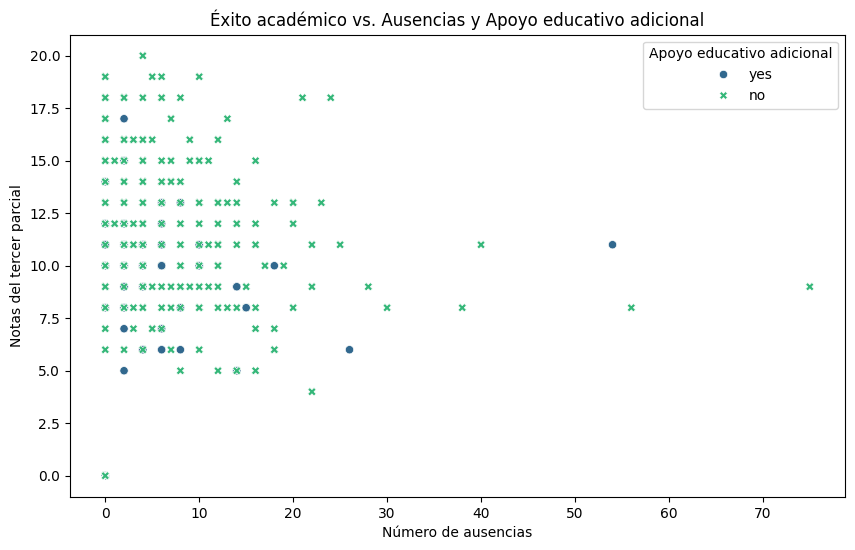

In [81]:
#Compara el éxito académico con las ausencias y los apoyos educativos adicionales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ausencias', y='P3', hue='apoyo_educativo_adicional', data=data, palette='viridis', style='apoyo_educativo_adicional')
plt.title('Éxito académico vs. Ausencias y Apoyo educativo adicional')
plt.xlabel('Número de ausencias')
plt.ylabel('Notas del tercer parcial')
plt.legend(title='Apoyo educativo adicional')
plt.show()


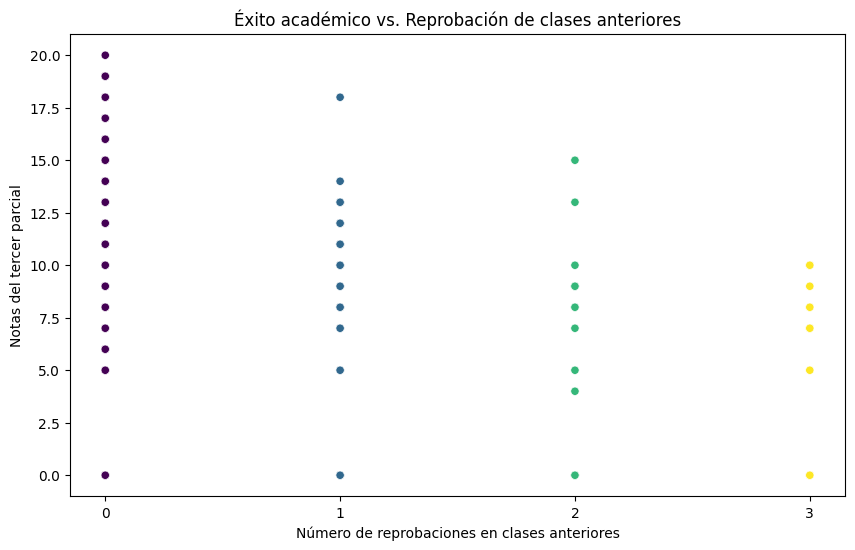

In [82]:
# Comparar el éxito académico con la reprobación de clases anteriores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reprobacion', y='P3', data=data, hue='reprobacion', palette='viridis', legend=False)
plt.title('Éxito académico vs. Reprobación de clases anteriores')
plt.xlabel('Número de reprobaciones en clases anteriores')
plt.ylabel('Notas del tercer parcial')

plt.xticks(ticks=[0, 1, 2, 3], labels=['0', '1', '2', '3'])

plt.show()


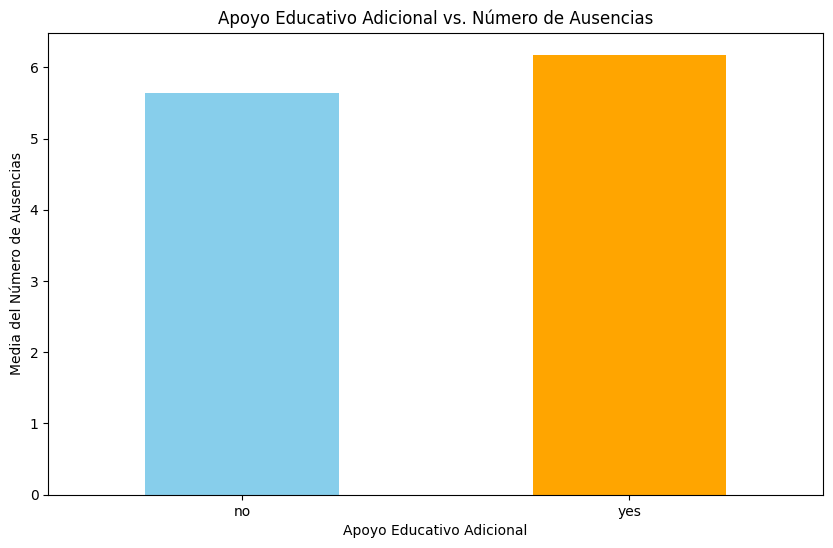

In [83]:
# Calcular la media del número de ausencias para cada categoría de apoyo educativo adicional
mean_ausencias_apoyo = data.groupby('apoyo_educativo_adicional')['ausencias'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
mean_ausencias_apoyo.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Apoyo Educativo Adicional vs. Número de Ausencias')
plt.xlabel('Apoyo Educativo Adicional')
plt.ylabel('Media del Número de Ausencias')
plt.xticks(rotation=0)
plt.show()


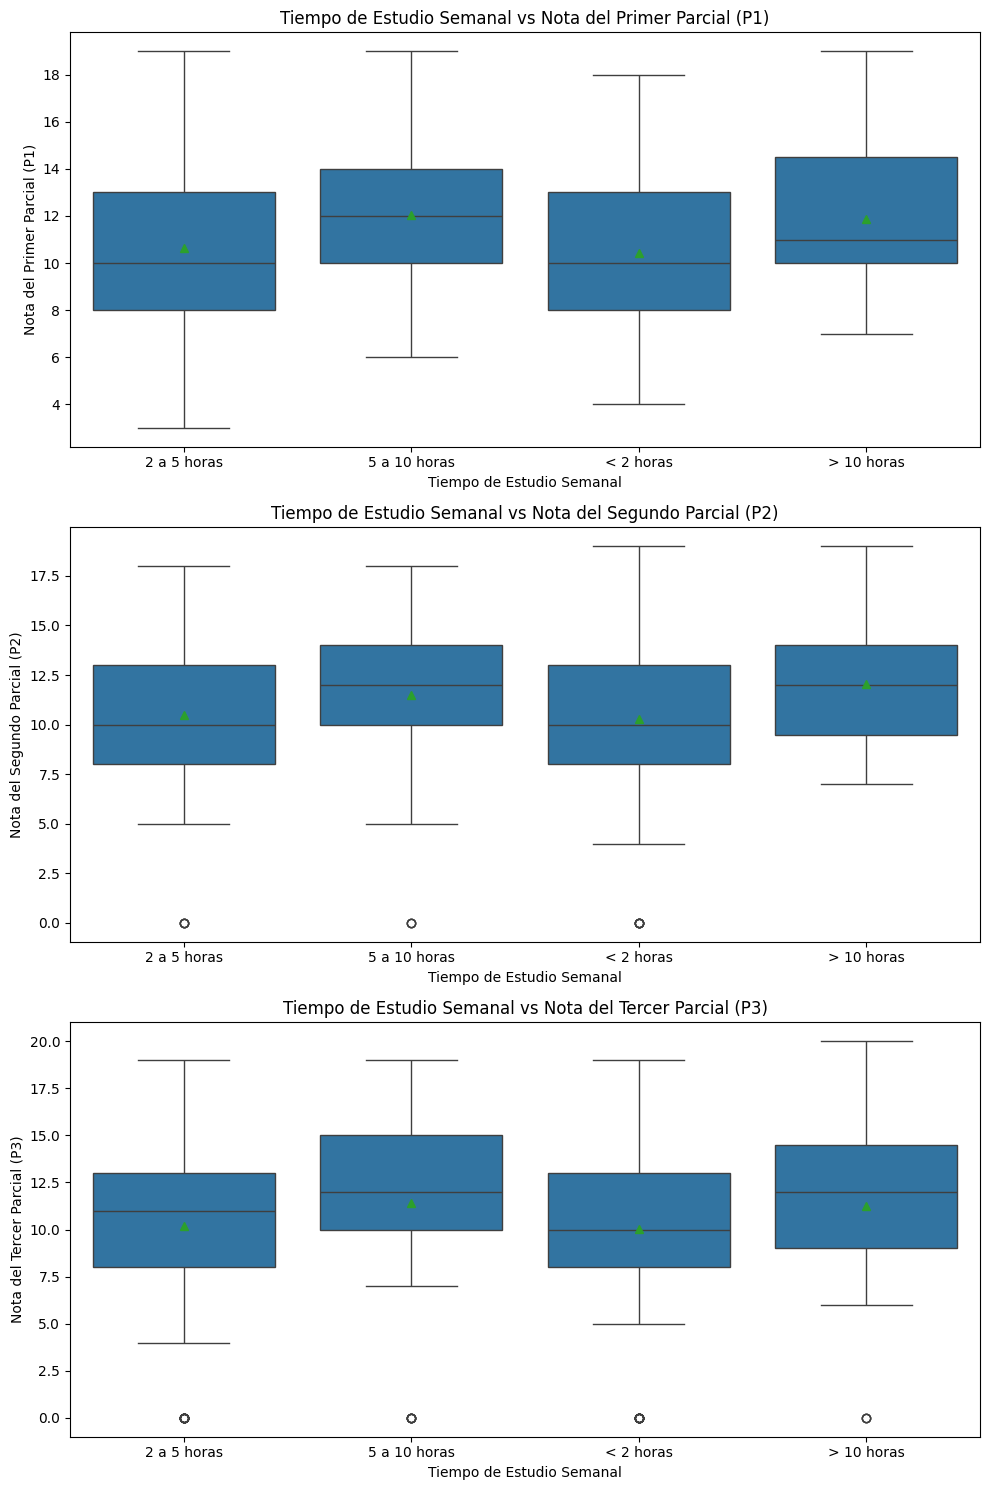

In [84]:
# Diccionario de mapeo para los intervalos de tiempo de estudio
tiempo_estudio_labels = {
    1: '< 2 horas',
    2: '2 a 5 horas',
    3: '5 a 10 horas',
    4: '> 10 horas'
}

# Crear una columna adicional en el DataFrame para las etiquetas de tiempo de estudio
data['tiempo_estudio_label'] = data['tiempo_estudio'].map(tiempo_estudio_labels)

# Crear el gráfico de cajas para P1, P2 y P3 con etiquetas más descriptivas
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

sns.boxplot(x='tiempo_estudio_label', y='P1', data=data, ax=axs[0], showmeans=True)
axs[0].set_title('Tiempo de Estudio Semanal vs Nota del Primer Parcial (P1)')
axs[0].set_xlabel('Tiempo de Estudio Semanal')
axs[0].set_ylabel('Nota del Primer Parcial (P1)')

sns.boxplot(x='tiempo_estudio_label', y='P2', data=data, ax=axs[1], showmeans=True)
axs[1].set_title('Tiempo de Estudio Semanal vs Nota del Segundo Parcial (P2)')
axs[1].set_xlabel('Tiempo de Estudio Semanal')
axs[1].set_ylabel('Nota del Segundo Parcial (P2)')

sns.boxplot(x='tiempo_estudio_label', y='P3', data=data, ax=axs[2], showmeans=True)
axs[2].set_title('Tiempo de Estudio Semanal vs Nota del Tercer Parcial (P3)')
axs[2].set_xlabel('Tiempo de Estudio Semanal')
axs[2].set_ylabel('Nota del Tercer Parcial (P3)')

plt.tight_layout()
plt.suptitle('')  
plt.show()
